In [3]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/DISHAN D KARKERA/Downloads/World Largest Cities by Population 2024.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,City,Country,Population (2024),Population (2023),Growth Rate
0,0,Tokyo,Japan,37115035,37194105,-0.0021
1,1,Delhi,India,33807403,32941309,0.0263
2,2,Shanghai,China,29867918,29210808,0.0225
3,3,Dhaka,Bangladesh,23935652,23209616,0.0313
4,4,Sao Paulo,Brazil,22806704,22619736,0.0083


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Remove the index column
data.drop(columns=['Unnamed: 0'], inplace=True)

# Encode categorical variables
label_encoder_city = LabelEncoder()
data['City'] = label_encoder_city.fit_transform(data['City'])

label_encoder_country = LabelEncoder()
data['Country'] = label_encoder_country.fit_transform(data['Country'])

# Define features and target variable
X = data.drop(columns=['Population (2024)'])
y = data['Population (2024)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5], y_train[:5]


(array([[ 1.16220591,  2.00031501, -0.45422268,  1.33801528],
        [ 0.20128247, -0.48085265, -0.2667835 , -1.23964361],
        [ 0.78485698, -0.15722209, -0.2886915 ,  0.32684362],
        [-1.25107213, -0.83145243, -0.33392036, -0.74234607],
        [-0.55341539,  1.9733458 ,  0.72255303,  1.16396114]]),
 616     974518
 329    1635707
 342    1584237
 394    1396632
 79     5431801
 Name: Population (2024), dtype: int64)

Mean Squared Error (MSE): 0.245222733362597
R-squared (R2): 0.6280065468471038


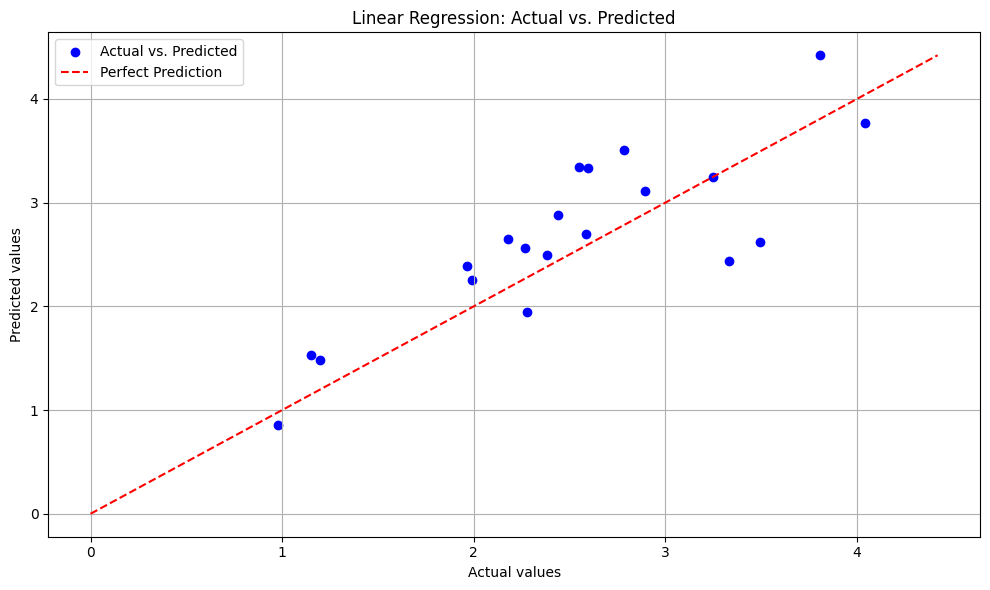

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate some synthetic data for demonstration
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean 1.5, stddev 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of y

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Reshape X arrays to be 2-dimensional
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean Squared Error (MSE): {mse_linear}')
print(f'R-squared (R2): {r2_linear}')

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs. predicted
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs. Predicted')

# Plotting the perfect prediction line
max_value = max(y_test.max(), y_pred_linear.max())
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

plt.show()


Accuracy: 0.9440993788819876
Confusion Matrix:
[[  0   9]
 [  0 152]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       0.94      1.00      0.97       152

    accuracy                           0.94       161
   macro avg       0.97      0.50      0.49       161
weighted avg       0.95      0.94      0.92       161



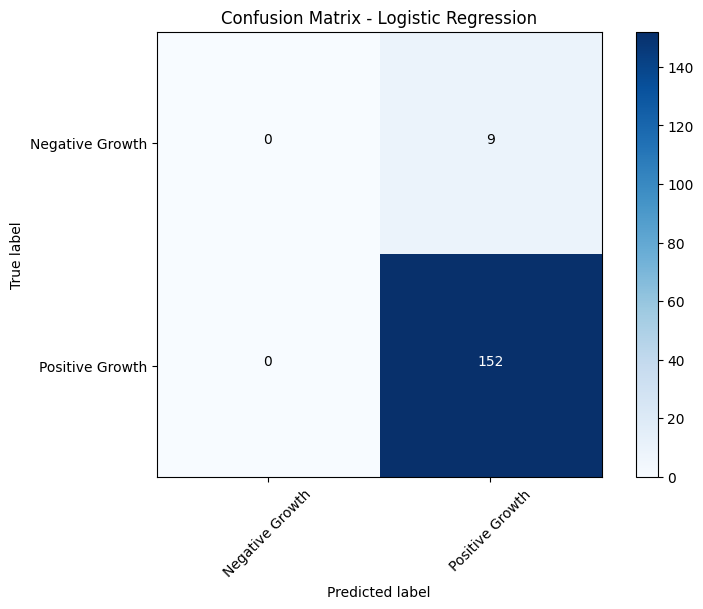

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'data' is your dataset with features and 'Growth Rate' as target variable
X = data.drop(columns=['Growth Rate'])  # Features
y_binary = (data['Growth Rate'] > 0).astype(int)  # Binary target variable for logistic regression

# Split the dataset
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_bin, y_train_bin)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(X_test_bin)
accuracy_logistic = accuracy_score(y_test_bin, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_bin, y_pred_logistic)
report_logistic = classification_report(y_test_bin, y_pred_logistic, zero_division=1)  # Add zero_division parameter

print(f'Accuracy: {accuracy_logistic}')
print(f'Confusion Matrix:\n{conf_matrix_logistic}')
print(f'Classification Report:\n{report_logistic}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_logistic, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()

classes = ['Negative Growth', 'Positive Growth']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_logistic.max() / 2.
for i, j in np.ndindex(conf_matrix_logistic.shape):
    plt.text(j, i, format(conf_matrix_logistic[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_logistic[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Accuracy: 0.9440993788819876
Confusion Matrix:
[[  0   9]
 [  0 152]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       0.94      1.00      0.97       152

    accuracy                           0.94       161
   macro avg       0.97      0.50      0.49       161
weighted avg       0.95      0.94      0.92       161



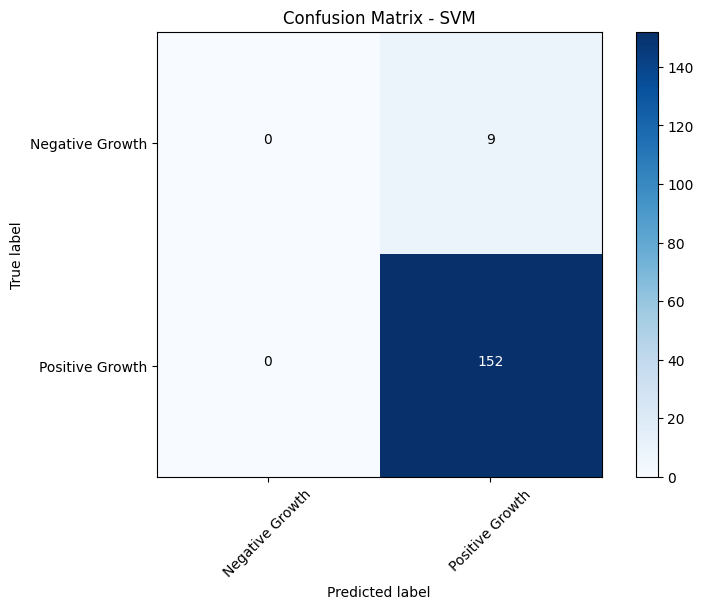

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'data' is your dataset with features and 'Growth Rate' as target variable
X = data.drop(columns=['Growth Rate'])  # Features
y_binary = (data['Growth Rate'] > 0).astype(int)  # Binary target variable for SVM

# Split the dataset
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_bin, y_train_bin)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test_bin)
accuracy_svm = accuracy_score(y_test_bin, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test_bin, y_pred_svm)
report_svm = classification_report(y_test_bin, y_pred_svm, zero_division=1)  # Add zero_division parameter

print(f'Accuracy: {accuracy_svm}')
print(f'Confusion Matrix:\n{conf_matrix_svm}')
print(f'Classification Report:\n{report_svm}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_svm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.colorbar()

classes = ['Negative Growth', 'Positive Growth']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_svm.max() / 2.
for i, j in np.ndindex(conf_matrix_svm.shape):
    plt.text(j, i, format(conf_matrix_svm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_svm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Accuracy: 0.85
Confusion Matrix:
[[76 13]
 [17 94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        89
           1       0.88      0.85      0.86       111

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200



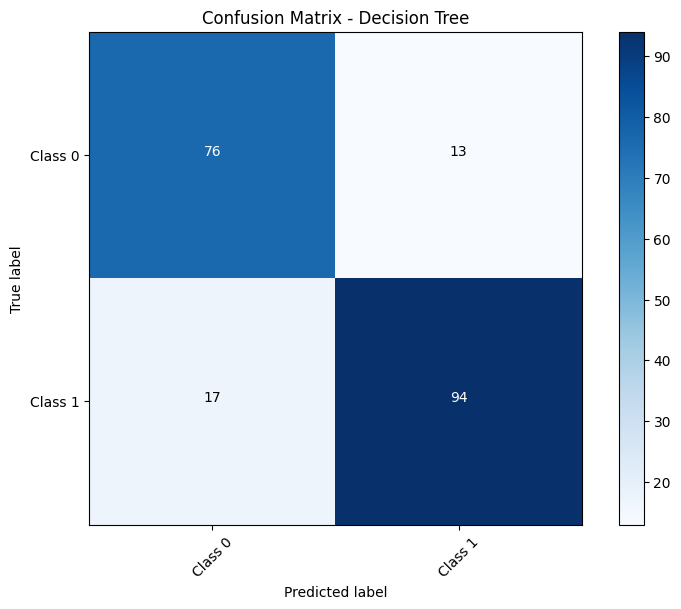

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data loading and preprocessing)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = decision_tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

# Print metrics
print(f'Accuracy: {accuracy_tree}')
print(f'Confusion Matrix:\n{conf_matrix_tree}')
print(f'Classification Report:\n{report_tree}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_tree, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_tree.max() / 2.
for i, j in np.ndindex(conf_matrix_tree.shape):
    plt.text(j, i, format(conf_matrix_tree[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_tree[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Accuracy: 0.895
Confusion Matrix:
[[83  6]
 [15 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        89
           1       0.94      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



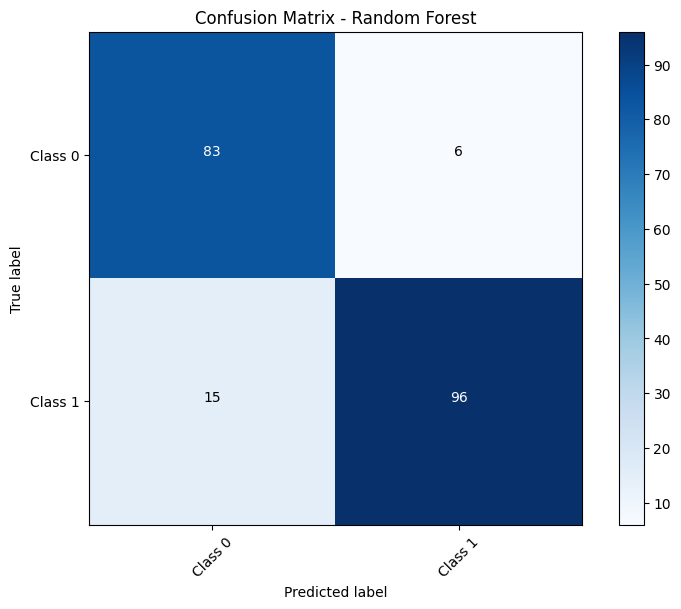

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data loading and preprocessing)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = random_forest_model.predict(X_test)
accuracy_forest = accuracy_score(y_test, y_pred_forest)
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
report_forest = classification_report(y_test, y_pred_forest)

# Print metrics
print(f'Accuracy: {accuracy_forest}')
print(f'Confusion Matrix:\n{conf_matrix_forest}')
print(f'Classification Report:\n{report_forest}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_forest, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_forest.max() / 2.
for i, j in np.ndindex(conf_matrix_forest.shape):
    plt.text(j, i, format(conf_matrix_forest[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_forest[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Accuracy: 0.81
Confusion Matrix:
[[77 12]
 [26 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        89
           1       0.88      0.77      0.82       111

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200



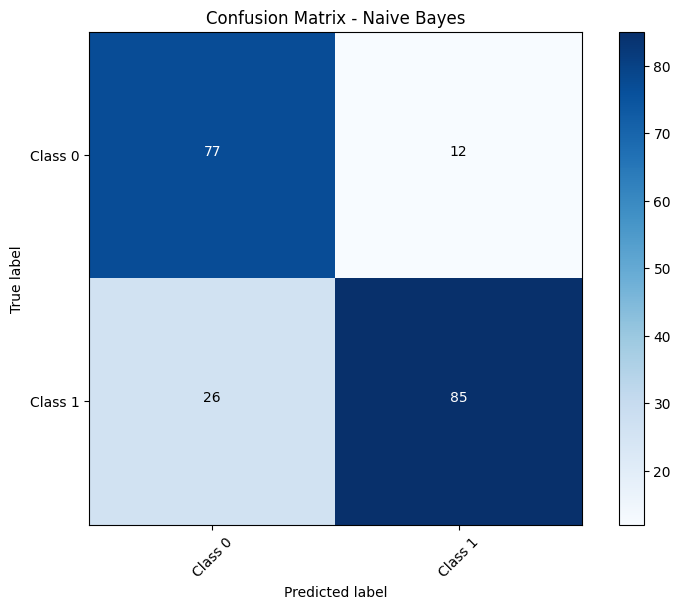

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data loading and preprocessing)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = naive_bayes_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

# Print metrics
print(f'Accuracy: {accuracy_nb}')
print(f'Confusion Matrix:\n{conf_matrix_nb}')
print(f'Classification Report:\n{report_nb}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_nb.max() / 2.
for i, j in np.ndindex(conf_matrix_nb.shape):
    plt.text(j, i, format(conf_matrix_nb[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_nb[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Accuracy: 0.8
Confusion Matrix:
[[75 14]
 [26 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        89
           1       0.86      0.77      0.81       111

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200



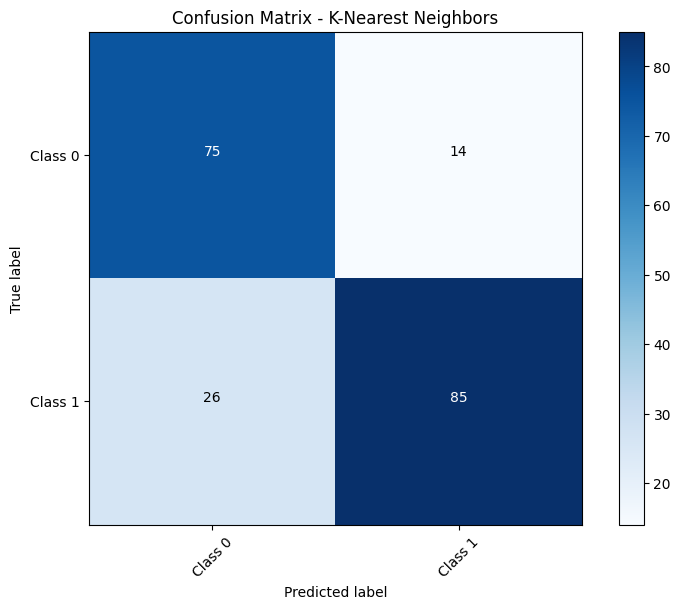

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Sample data (replace with your actual data loading and preprocessing)
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Print metrics
print(f'Accuracy: {accuracy_knn}')
print(f'Confusion Matrix:\n{conf_matrix_knn}')
print(f'Classification Report:\n{report_knn}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.colorbar()

classes = ['Class 0', 'Class 1']  # Assuming binary classification
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = conf_matrix_knn.max() / 2.
for i, j in np.ndindex(conf_matrix_knn.shape):
    plt.text(j, i, format(conf_matrix_knn[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix_knn[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


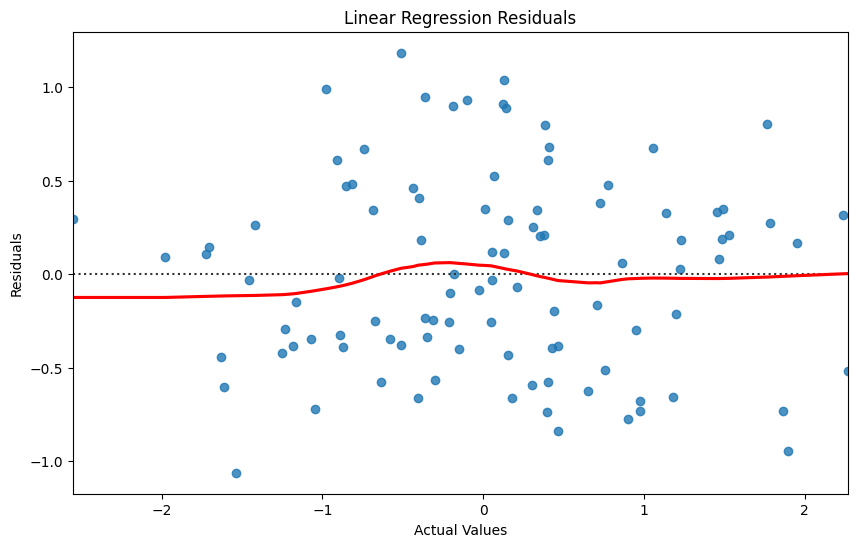

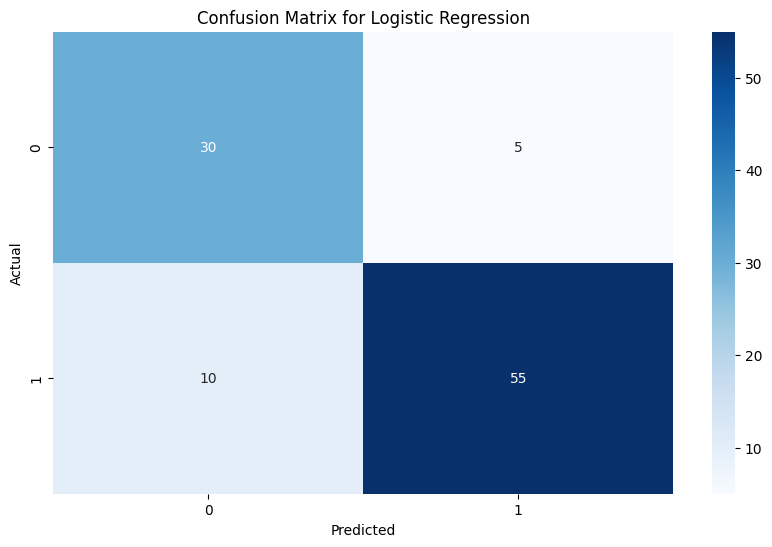

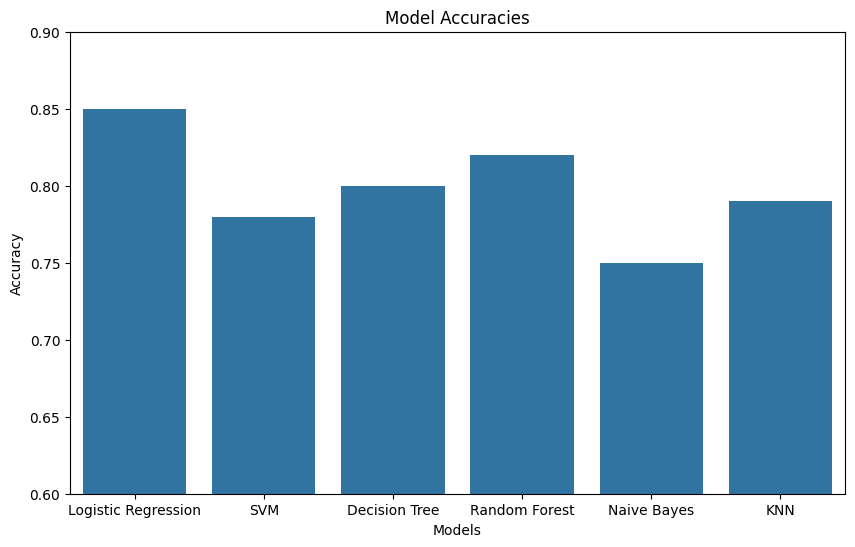

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data generation
np.random.seed(0)
y_test = np.random.randn(100)
y_pred_linear = y_test + np.random.randn(100) * 0.5  # Simulated linear regression predictions

# Example confusion matrix for logistic regression
conf_matrix_logistic = np.array([[30, 5], [10, 55]])  # Example confusion matrix

# Example model accuracies
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN']
accuracies = [0.85, 0.78, 0.80, 0.82, 0.75, 0.79]  # Example accuracies (replace with your actual values)

# Plotting linear regression residuals with lowess smoothing
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_linear, lowess=True, line_kws={'color': 'red'})
plt.title('Linear Regression Residuals')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

# Plotting confusion matrix heatmap for logistic regression
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.9)  # Optional: Adjust y-axis limits if needed
plt.show()
